<a href="https://colab.research.google.com/github/Bhavanadh/sales-analysis-project/blob/main/sales_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   Sout

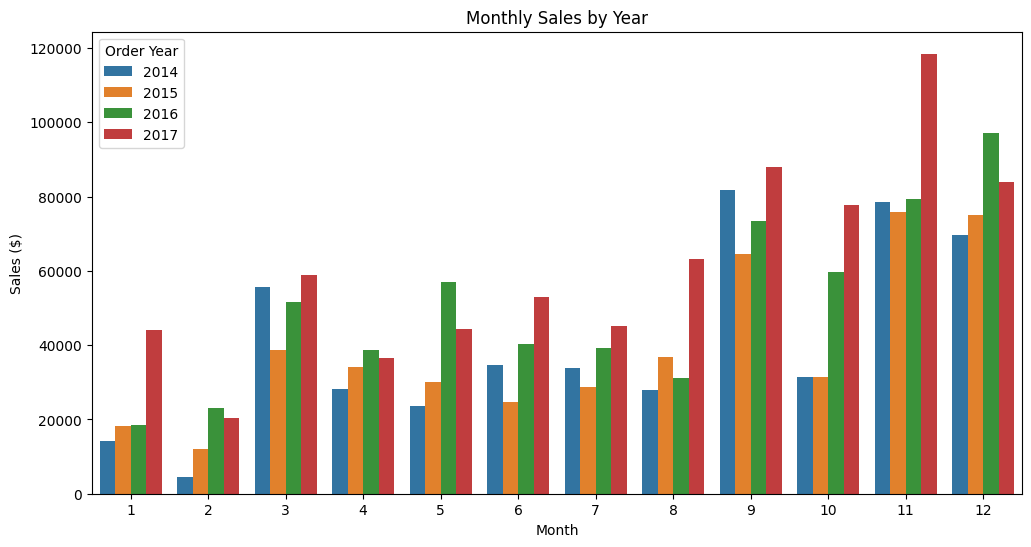

/tmp/ipython-input-5-3052171904.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette='magma')


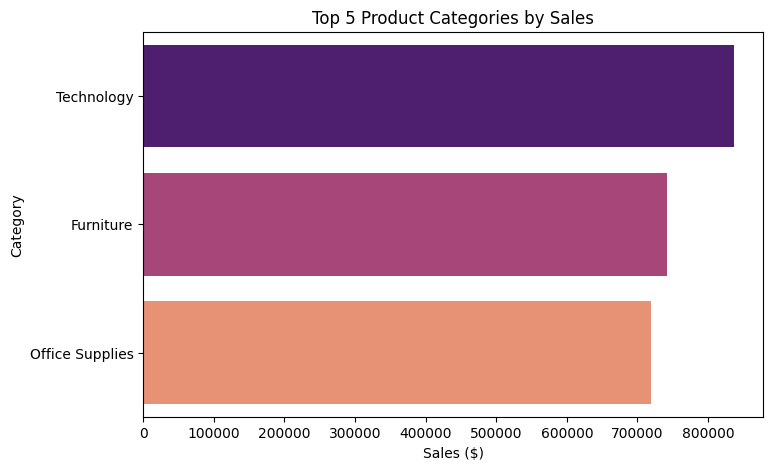

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the uploaded file, trying 'latin-1' encoding
try:
    df = pd.read_csv("superstore.csv", encoding='utf-8')
except UnicodeDecodeError:
    df = pd.read_csv("superstore.csv", encoding='latin-1')


# Inspect the dataframe
print(df.head())
print(df.columns)

# Convert 'Order Date' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# Drop rows with invalid dates (optional but safer)
df = df.dropna(subset=['Order Date'])

# Create Year and Month columns
df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month

# Total monthly sales by year
monthly_sales = df.groupby(['Order Year', 'Order Month'])['Sales'].sum().reset_index()

# Plot monthly sales
plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_sales, x='Order Month', y='Sales', hue='Order Year', palette='tab10')
plt.title("Monthly Sales by Year")
plt.xlabel("Month")
plt.ylabel("Sales ($)")
plt.show()

# Top 5 product categories by revenue
top_categories = df.groupby('Category')['Sales'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(8, 5))
sns.barplot(x=top_categories.values, y=top_categories.index, palette='magma')
plt.title('Top 5 Product Categories by Sales')
plt.xlabel('Sales ($)')
plt.ylabel('Category')
plt.show()